### Problem Statement

To understand the distribution of students that understand the effectiveness of breast self examination (Hereafter referred as BSE) across different domains (Medico, Nursing, Pharmaceutical and Engineering).

### Target Population

Young women that are students of the following fields:
* Medicine
* Nursing
* Pharmaceutical
* Engineering

### Methodology

Use hypothesis testing techniques to check whether there are different distributions of students that understand BSE across different domains.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the dataset
df = pd.read_csv('BSE.csv')
#Dropping unnamed columns
df = df.iloc[:,0:34]

#Looking at the head
df.head()

,Sl. No.,Age,Occupation,Academic Status,Yr,Menarche,No. of Days in Cycles,No. of Days of bleeding,Sanitary Napkins/Day,Regularity,...,Clinical BE,Breast health issue,Perform BSE,Detect abnormalities,Teach BSE,Training Programme,Prevents future problems,Anxiety,Breast Ca in future,Long lasting problems
0,1,21.0,Student,M,4.0,13.0,28,4,2,1.0,...,0.0,0,5.0,5.0,6.0,6.0,6.0,5.0,4.0,4.0
1,2,20.0,Student,M,1.0,13.0,32,6,4,1.0,...,0.0,0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,4.0
2,3,20.0,Student,M,1.0,14.0,30 to 45,4,2,0.0,...,0.0,0,5.0,5.0,5.0,7.0,7.0,5.0,5.0,5.0
3,4,19.0,Student,M,1.0,14.0,32,4,3,0.0,...,0.0,0,6.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0
4,5,20.0,Student,M,1.0,13.0,15(Hypothyroid),1 to 8,2,1.0,...,0.0,0,5.0,5.0,5.0,7.0,7.0,7.0,5.0,7.0


In [3]:
#Getting summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,192.0,20.140625,1.726303,12.0,19.00,20.0,21.0,25.0
Yr,164.0,2.670732,1.448967,1.0,1.00,2.5,4.0,6.0
Menarche,192.0,13.223958,1.209409,10.0,13.00,13.0,14.0,17.0
Regularity,192.0,0.880208,0.325567,0.0,1.00,1.0,1.0,1.0
Postponement pills,192.0,0.041667,0.200349,0.0,0.00,0.0,0.0,1.0
1st degree relative,192.0,0.005208,0.072169,0.0,0.00,0.0,0.0,1.0
What is BSE,192.0,0.484375,0.501062,0.0,0.00,0.0,1.0,1.0
How is BSE done,192.0,0.411458,0.493384,0.0,0.00,0.0,1.0,1.0
Spoken with doctor,192.0,0.078125,0.269070,0.0,0.00,0.0,0.0,1.0
Spoken with friend,192.0,0.343750,0.476201,0.0,0.00,0.0,1.0,1.0


### Dropping unnecceasry columns

In [4]:
#Dropping these columns based on domain understanding
df.drop(columns=['Yr','No. of Days in Cycles','No. of Days of bleeding','Sanitary Napkins/Day'], inplace=True)

### Exploratory Data Analysis

### Lets look at a distribution of our classes

In [7]:
#Treating the Academic Status column
df['Academic Status'].replace({'M':'Medico','E':'Engineer','P':'Pharmaceutical','N':'Nursing'}, inplace = True)

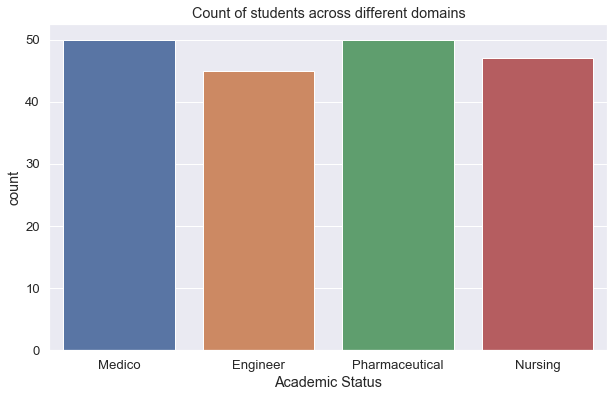

In [8]:
#Getting the counts of students across different domains
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
plt.title('Count of students across different domains')
sns.countplot(df['Academic Status'])
plt.show()

**Insight:** There seems to be an equal distribution of students across different domains.

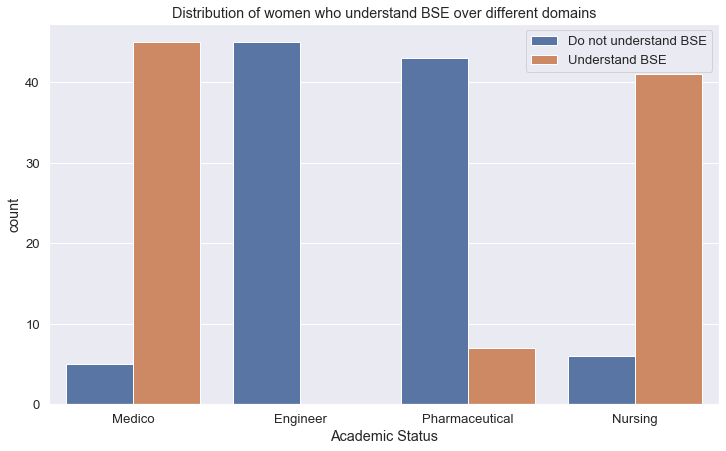

In [9]:
plt.figure(figsize = (12,7))
sns.set(font_scale=1.2)
sns.countplot(x = 'Academic Status', hue = 'What is BSE', data = df)
plt.title('Distribution of women who understand BSE over different domains')
plt.legend(['Do not understand BSE','Understand BSE'])
plt.show()

**Insights:**
1. Most of the Engineering and Pharmaceutical students do not understand what BSE is.
2. Most of the Medico and Nursing students seem to be quite familar with BSE.
3. From this particular distribution we get a picture that, students in specific domains understand BSE better than students in others.

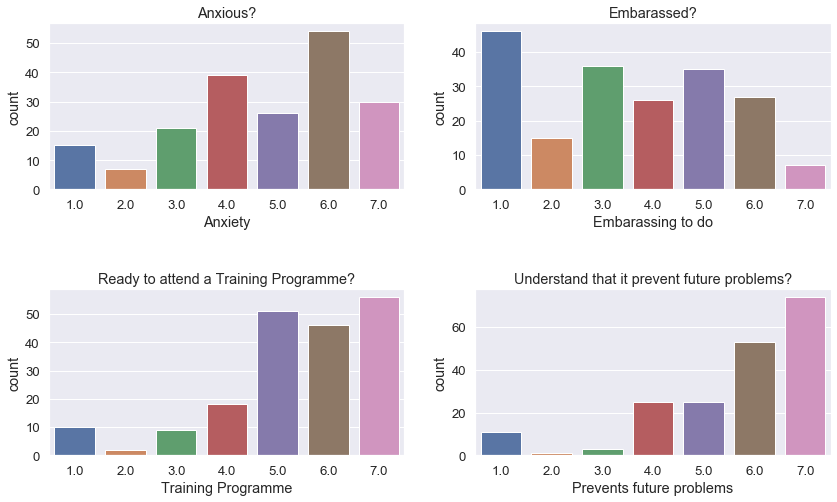

In [6]:
plt.figure(figsize=(14,16))
sns.set(font_scale=1.2)
plt.subplots_adjust(top = 0.5,  hspace= 0.6, wspace=0.2)
plt.subplot(2,2,1)
plt.title('Anxious?')
sns.countplot(df['Anxiety'])
plt.subplot(2,2,2)
plt.title('Embarassed?')
sns.countplot(df['Embarassing to do'])
plt.subplot(2,2,3)
plt.title('Ready to attend a Training Programme?')
sns.countplot(df['Training Programme'])
plt.subplot(2,2,4)
plt.title('Understand that it prevent future problems?')
sns.countplot(df['Prevents future problems'])
plt.show()

**Insights:**
1. Most women are anxious about the outcome of BSE, but they are not as embarassed.
2. Most women are ready to attend a training programme and accept that it may help prevent future problems..

### Problem Statement  
**Null Hypothesis, H0**: There is no difference between BSE understanding acoss different domains.  
**Alternate Hypothesis, Ha**: There is a difference between BSE understanding acoss different domains.  
**Test Used:** Two Sample Independent t-test  
**Confidence:** 95%  


In [10]:
#Proportion of engineering students that understand BSE
n1 = df[df['Academic Status'] == 'Engineer']['Age'].count()
p1 = df[(df['Academic Status'] == 'Engineer') & (df['What is BSE'] == 1)]['Age'].count()/n1
print('Proportion of engineering students that understand BSE = %.2f'%(p1*100)+'%')

#Proportion of Nursing students that understand BSE
n2 = df[df['Academic Status'] == 'Nursing']['Age'].count()
p2 = df[(df['Academic Status'] == 'Nursing') & (df['What is BSE'] == 1)]['Age'].count()/n2
print('Proportion of Nursing students that understand BSE = %.2f'%(p2*100)+'%')

#Proportion of Medico students that understand BSE
n3 = df[df['Academic Status'] == 'Medico']['Age'].count()
p3 = df[(df['Academic Status'] == 'Medico') & (df['What is BSE'] == 1)]['Age'].count()/n3
print('Proportion of Medico students that understand BSE = %.2f'%(p3*100)+'%')

#Proportion of Pharmaceutical students that understand BSE
n4 = df[df['Academic Status'] == 'Pharmaceutical']['Age'].count()
p4 = df[(df['Academic Status'] == 'Pharmaceutical') & (df['What is BSE'] == 1)]['Age'].count()/n4
print('Proportion of Pharmaceutical students that understand BSE = %.2f'%(p4*100)+'%')

Proportion of engineering students that understand BSE = 0.00%
Proportion of Nursing students that understand BSE = 87.23%
Proportion of Medico students that understand BSE = 90.00%
Proportion of Pharmaceutical students that understand BSE = 14.00%


In [19]:
import statsmodels.api as sm
#Initializing a list of domain names
col1 = ['Medico','Engineer', 'Nursing', 'Pharmaceutical']
for i in range(0,len(col1)):
    for j in range(i+1, len(col1)):
        #a = t-stat, b = p=value, c = degrees of freedom
        a,b,c = sm.stats.ttest_ind(df[df['Academic Status'] == col1[i]]['What is BSE'],\
                                   df[df['Academic Status'] == col1[j]]['What is BSE'])   
        #Printing the hypothesis testing outcome
        print('Test of proportions between %s and % s :'%(col1[i], col1[j]))
        if(b < 0.0001):
            print('P-value < 0.05')
        else:
            print('P-value = %.3f'%b)        
        
        if(b > 0.05):
            print('Fail to reject the null hypothesis! \n')
        else:
            print('Reject the null hypothesis! \n')

Test of proportions between Medico and Engineer :
P-value < 0.05
Reject the null hypothesis! 

Test of proportions between Medico and Nursing :
P-value = 0.672
Fail to reject the null hypothesis! 

Test of proportions between Medico and Pharmaceutical :
P-value < 0.05
Reject the null hypothesis! 

Test of proportions between Engineer and Nursing :
P-value < 0.05
Reject the null hypothesis! 

Test of proportions between Engineer and Pharmaceutical :
P-value = 0.009
Reject the null hypothesis! 

Test of proportions between Nursing and Pharmaceutical :
P-value < 0.05
Reject the null hypothesis! 



### Conclusion
* Assuming that the 4 domains are independent, we have used the two sample independent t-test to validate our hypothesis.
* Based on the above findings, we can say that apart from medico and nursing students, the other combination of domains have very different distribution of students that understand BSE.

___